In [1]:
!pip install q keras==2.1.5

     |████████████████████████████████| 337kB 6.4MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import Ipynb_importer
import keras
# from tensorflow import keras
from keras import backend as K
from keras.optimizers import Optimizer
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential
import numpy as np
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from optimizers import MaSS
from cifar10 import load
from resnet import resnet_v1, resnet_v2
import os
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 

Using TensorFlow backend.


In [4]:
tf.__version__

'1.15.2'

In [5]:
keras.__version__

'2.1.5'

In [6]:
batch_size = 64  
epochs = 150
data_augmentation = True
num_classes = 10

## Load Cifar-10 data
#(x_train, y_train), (x_test, y_test) = load()
#input_shape = x_train.shape[1:]

# Model parameters
n = 5
version = 1
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)



os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
# batch_size = 32
# epochs = 100
data_augmentation = True
num_classes = 10
learning_rate=0.1
# Load Cifar-10 data
(x_train, y_train), (x_test, y_test) = load()
input_shape = x_train.shape[1:]

# Model parameters
n = 5
version = 1
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)
################################################################
# Whenever learning rate reduces, restart the MaSS optimizer at the latest learned weights.
# (If not reducing learning rate during training, one can have only one stage.)
#
#Stage 1: epoch 1-150. Learning rate: 0.1
################################################################


#
#
#################################################################
## Whenever learning rate reduces, restart the MaSS optimizer at the latest learned weights.
## (If not reducing learning rate during training, one can have only one stage.)
##
##Stage 1: epoch 1-150. Learning rate: 0.1
#################################################################

# Build model
model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = 0.3, alpha = 0.05, kappa_t = 24)
model.compile(loss='categorical_crossentropy',
             optimizer=mass,
             metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
   os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
   result1 = model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=100,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=callbacks)
else:
   print('Using real-time data augmentation.')

   # This will do preprocessing and realtime data augmentation:
   datagen = ImageDataGenerator(
       featurewise_center=False,           	# set input mean to 0 over the dataset
       samplewise_center=False,            	# set each sample mean to 0        
       featurewise_std_normalization=False,    # divide inputs by std of dataset        
       samplewise_std_normalization=False,     # divide each input by its std
       zca_whitening=False,                    # apply ZCA whitening        
       rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
       width_shift_range=0.1,                  # randomly shift images horizontally        
       height_shift_range=0.1,                 # randomly shift images vertically        
       horizontal_flip=True,                   # randomly flip images        
       vertical_flip=False)                    # randomly flip images

   res1 = datagen.fit(x_train)
   # Fit the model on the batches generated by datagen.flow().
   result1 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                       validation_data=(x_test, y_test),
                       epochs=150, verbose=1, workers=4,
                                callbacks=callbacks)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])




170500096/170498071 [==============================] - 4s 0us/step
Load CIFAR-10 dataset.
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)














__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activ

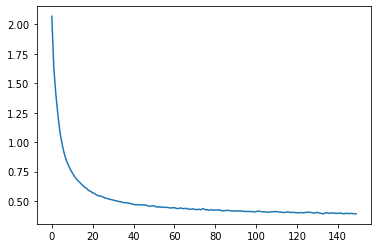

In [7]:
import matplotlib.pyplot as plt

plt.plot(result1.history['loss'])

In [8]:
# Build model
model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.3),
             metrics=['accuracy'])
model.summary()
# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
   os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
   result2 = model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=100,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=callbacks)
else:
   print('Using real-time data augmentation.')

   # This will do preprocessing and realtime data augmentation:
   datagen = ImageDataGenerator(
       featurewise_center=False,           	# set input mean to 0 over the dataset
       samplewise_center=False,            	# set each sample mean to 0        
       featurewise_std_normalization=False,    # divide inputs by std of dataset        
       samplewise_std_normalization=False,     # divide each input by its std
       zca_whitening=False,                    # apply ZCA whitening        
       rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
       width_shift_range=0.1,                  # randomly shift images horizontally        
       height_shift_range=0.1,                 # randomly shift images vertically        
       horizontal_flip=True,                   # randomly flip images        
       vertical_flip=False)                    # randomly flip images

   res2 = datagen.fit(x_train)
   # Fit the model on the batches generated by datagen.flow().
   result2 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                       validation_data=(x_test, y_test),
                       epochs=epochs, verbose=1, workers=4,
                                callbacks=callbacks)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 32, 32, 16)   448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_32 (BatchNo (None, 32, 32, 16)   64          conv2d_34[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 32, 32, 16)   0           batch_normalization_32[0][0]     
__________________________________________________________________________________________________
conv2d_35 

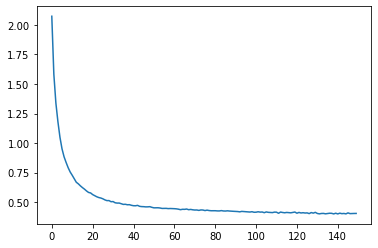

In [9]:
import matplotlib.pyplot as plt

plt.plot(result2.history['loss'])

In [10]:

# Build model
model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = 0.1, alpha = 0.05, kappa_t = 2)
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.3,momentum=0.9,nesterov=True),
             metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
   os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
   result3 = model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=100,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=callbacks)
else:
   print('Using real-time data augmentation.')

   # This will do preprocessing and realtime data augmentation:
   datagen = ImageDataGenerator(
       featurewise_center=False,           	# set input mean to 0 over the dataset
       samplewise_center=False,            	# set each sample mean to 0        
       featurewise_std_normalization=False,    # divide inputs by std of dataset        
       samplewise_std_normalization=False,     # divide each input by its std
       zca_whitening=False,                    # apply ZCA whitening        
       rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
       width_shift_range=0.1,                  # randomly shift images horizontally        
       height_shift_range=0.1,                 # randomly shift images vertically        
       horizontal_flip=True,                   # randomly flip images        
       vertical_flip=False)                    # randomly flip images

   res3 = datagen.fit(x_train)
   # Fit the model on the batches generated by datagen.flow().
   result3 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                       validation_data=(x_test, y_test),
                       epochs=epochs, verbose=1, workers=4,
                                callbacks=callbacks)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 32, 32, 16)   448         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 32, 32, 16)   64          conv2d_67[0][0]                  
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 32, 32, 16)   0           batch_normalization_63[0][0]     
__________________________________________________________________________________________________
conv2d_68 

In [40]:

# Build model
model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = 0.1, alpha = 0.05, kappa_t = 2)
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.3,momentum=0.9,nesterov=True),
             metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
   os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
   result_test = model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=100,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=callbacks)
else:
   print('Using real-time data augmentation.')

   # This will do preprocessing and realtime data augmentation:
   datagen = ImageDataGenerator(
       featurewise_center=False,           	# set input mean to 0 over the dataset
       samplewise_center=False,            	# set each sample mean to 0        
       featurewise_std_normalization=False,    # divide inputs by std of dataset        
       samplewise_std_normalization=False,     # divide each input by its std
       zca_whitening=False,                    # apply ZCA whitening        
       rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
       width_shift_range=0.1,                  # randomly shift images horizontally        
       height_shift_range=0.1,                 # randomly shift images vertically        
       horizontal_flip=True,                   # randomly flip images        
       vertical_flip=False)                    # randomly flip images

   res_test = datagen.fit(x_train)
   # Fit the model on the batches generated by datagen.flow().
   result_test = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                       validation_data=(x_test, y_test),
                       epochs=epochs, verbose=1, workers=4,
                                callbacks=callbacks)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_529 (Conv2D)             (None, 32, 32, 16)   448         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_497 (BatchN (None, 32, 32, 16)   64          conv2d_529[0][0]                 
__________________________________________________________________________________________________
activation_497 (Activation)     (None, 32, 32, 16)   0           batch_normalization_497[0][0]    
__________________________________________________________________________________________________
conv2d_530

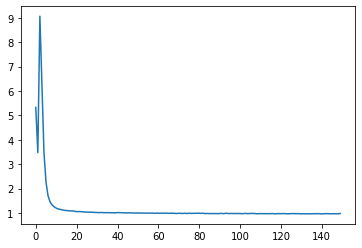

In [41]:
import matplotlib.pyplot as plt

plt.plot(result_test.history['loss'])

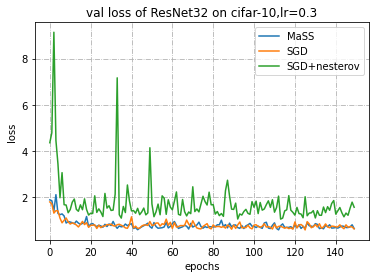

In [42]:
plt.plot(result1.history['val_loss'],label='MaSS')
plt.plot(result2.history['val_loss'],label='SGD')
plt.plot(result_test.history['val_loss'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("val loss of ResNet32 on cifar-10,lr=0.3")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

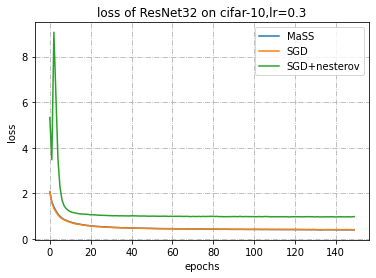

In [53]:
plt.plot(result1.history['loss'],label='MaSS')
plt.plot(result2.history['loss'],label='SGD')
plt.plot(result_test.history['loss'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("loss of ResNet32 on cifar-10,lr=0.3")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

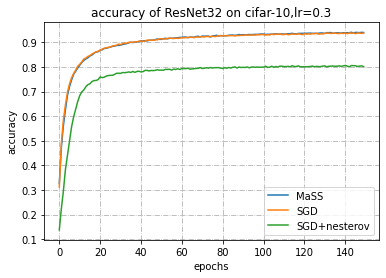

In [44]:
plt.plot(result1.history['acc'],label='MaSS')
plt.plot(result2.history['acc'],label='SGD')
plt.plot(result_test.history['acc'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("accuracy of ResNet32 on cifar-10,lr=0.3")
plt.grid(linestyle='-.')
plt.legend()
plt.show()

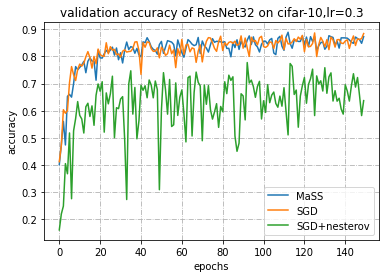

In [48]:
plt.plot(result1.history['val_acc'],label='MaSS')
plt.plot(result2.history['val_acc'],label='SGD')
plt.plot(result_test.history['val_acc'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("validation accuracy of ResNet32 on cifar-10,lr=0.3")
plt.grid(linestyle='-.')
plt.legend()
plt.show()

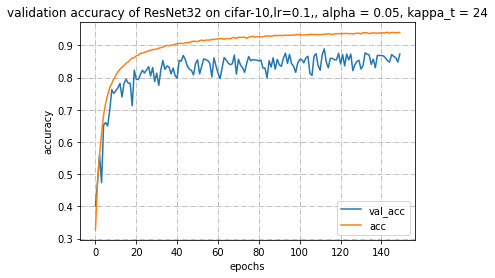

In [49]:
plt.plot(result1.history['val_acc'],label='val_acc')
plt.plot(result1.history['acc'],label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("validation accuracy of ResNet32 on cifar-10,lr=0.1,, alpha = 0.05, kappa_t = 24")
plt.grid(linestyle='-.')
plt.legend()
plt.show()

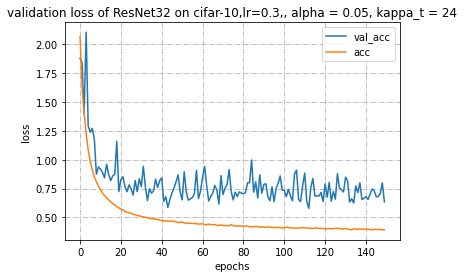

In [47]:
plt.plot(result1.history['val_loss'],label='val_acc')
plt.plot(result1.history['loss'],label='acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("validation loss of ResNet32 on cifar-10,lr=0.3,, alpha = 0.05, kappa_t = 24")
plt.grid(linestyle='-.')
plt.legend()
plt.show()